# Foreign Language Identification from Speech Files - Final Project
## Mr. Fakruddin Mohammed
### Deep Learning (CSCI E89)
### Harvard University

------------------------
------------------------

# Important Notes
## 1.If extract the contents of "ModelAndData.zip" to a folder called "ModelAndData"
## 2. And, if you start the jupyter notebook inside the "ModelAndData" folder, (which has 'dataDir' folder)
## 3 Then, you dont need to do anything, just click on "Run All". 


<img src="images/dir_structure.png" 
alt="End to End Approach - Sectrogram and MFCC" title="End to End Approach", width=450,height=400>

------------------
------------------

# READ ME.txt

This is brief notes explaining the contents of the "ModelAndData.zip" folder and the steps you need to follow to run the model using the supplied tiny data set of size <b>248</b> mp3 audio files. 


1.  Extract the contents of ModelAndData.zip folder to your desired location.<br>

2.  When you extract it you will the following directory structure <br><br>
<br>
ModelAndData/	
        .
        ./images			(this folder has image files embedded in jupyter notebook)
        ./dataDir 			(this is a CRITICAL base working directory for data with in the jupyter notebook.)
        ./dataDir/Training data 	(this folder has tiny dataset of around 248 audio MP3 files)
        ./datadir/trainingData.csv  (this csv file has output labels for each audio input file)
        ./readme.txt				(this is the readme.txt)
        ./LanguageIdentificationModel_FakruddinMohammed_V4.ipynb 	(this is jupyter notebook to run the model)

 
3.  To run the model, you must start the "jupyter notebook" from the directory where the ModelAndData.zip has been extracted. Otherwise, the jupyter notebook wont be able to find the 'dataDir' folder. 

4.  For whatever reasons if you cannot start from the extracted zip folder, you will have to edit the following line in the "LID_LanguageIdentification_FakruddinMohammed_V3.ipynb" jupyter notebook. <br>
<br>
<font color=red>Edit the following line to the suitable location where the zip files are extracted.</font><br>
<br>
<i>
base = './dataDir'<br>
    </i>
<br>

5.  Open the supplied jupyter notebook "LID_LanguageIdentification_FakruddinMohammed_V3.ipynb", then click on run-> all cells.<br>

6.  The model will take the data and output labels from the following directories and will start running the model<br><br>
./dataDir/Training data<br>
./dataDir/trainingData.csv<br><br>
7.  Since the model is giving the best performance for spectrogram image size of 32x32 and for MFCC vector size of 11, the model is set to run using these feature vector sizes and using the tiny sample data of (248 files)<br>

8.  The model produces the loss & accuracy results, for the following:<br><br>
	(a) Spectrogram 32x32 (without data augmentation)<br>
	(b) Spectrogram 32x32 (with data augmentation)<br>
	(c) MFCC vector size 11 (without data augmentation)<br>
	(d) MFCC vector size 11 (with data augmentation)<br>
<br>
9.  If you would like to run the model for different feature vector sizes, then edit the following lines<br>
For spectrogram size, edit the following two lines<br>
<br><i>
height=32<br>
width=32<br>
    </i>
<br>
For MFCC feature vector size, edit the following line<br>
<br>
<i>
feature_dim_2 = 11<br>
</i>
<br>
10.  If you would like to run the model on full data set downloaded from the website, then extract the contents of audio MP3 files to the following location:<br>
<br>
./dataDir/Training data<br>
./dataDir/trainingData.csv<br>



# Requirements.txt
#### Python Library Requirements are:
##### Python system libraries
1.  os
2.  shutil
3.  glob
4.  pathlib
##### Python audio processing library
1.  librosa

##### Python system libraries
1.  pandas
2.  numpy
3.  scipy
4.  matplotlib
5.  imageio
6.  skimage
7.  seaborn
8.  IPython
9.  plotly
10.  tqdm
##### Python Machine Learning Libraries
1.  sklearn
2.  keras
3.  skimage
4.  tensorflow


------------------------
------------------------

# The notebook has the following 4 major sections

## Part A: Spectrogram Approach (without data augmentation)
## Part B: Spectrogram Approach (with data augmentation)

## Part C: MFCC Approach (without data augmentation)
## Part D: MFCC Approach (with data augmentation)

### If you would like to run the model for different sizes of spectrogram or MFCC vector size just change the below variables
<br>
<font color=red>
For spectrogram size, edit the following two lines
<br>
height=32<br>
width=32<br>
For MFCC feature vector size, edit the following line
<br>
feature_dim_2 = 11<br>
</font>

------------------------
------------------------

### Import the necessary libraries

In [1]:
import os
import shutil
import numpy as np
import glob

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import imageio
import os
import librosa as lr
import shutil
import glob

In [4]:
from sklearn.preprocessing import LabelBinarizer
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer

Using TensorFlow backend.


In [6]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

In [7]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from scipy.io import wavfile
import IPython.display as ipd

from tqdm import tqdm



------------------------
------------------------

## Set the working directories as needed

#### 'Training data' - is a folder where the data is downloaded from website and extracted to 
#### 'trainingData.csv' - has the output labels for the input data set

#### 'targetLangaugesDataLabels.csv' - is the output labels file for selected audio files

# If you have followed all the instructions, there is nothing to change just 'Run All'


<font color=red>

1. The below is the only cell you need to change if you directory structured is different or if you not followed the instructions above.<br><br>

2. The important point is the model takes the input data and output labels from the 'dataDir' folder
</font>
<img src="images/dir_structure.png" 
alt="End to End Approach - Sectrogram and MFCC" title="End to End Approach", width=450,height=400>


<img src="images/dir_dataDir_Simple.png" alt="End to End Approach - Sectrogram and MFCC" title="End to End Approach", width=250,height=200>

In [8]:
base = './dataDir'

In [9]:
trainingDataFolderName = 'Training data'
trainingLabelsFile = 'trainingData.csv'

------------------------
------------------------

<img src="images/end_to_end.png" alt="End to End Approach - Sectrogram and MFCC" title="End to End Approach", width=450,height=400>

# Step 1 - Extract the Subset of Languages from the downloaded data set

<img src="images/arabic_map.png" alt="End to End Approach - Sectrogram and MFCC" title="End to End Approach", width=450,height=400>

In [10]:
# few selected language files are copied to the following folder
# for those few selected language files, the corresponding 
# output labels files are written to 'targetLanguagesDataLabels.csv'
targetFolderName = 'arabic'
targetLabelsFileName = 'targetLangaugesDataLabels.csv'

In [11]:
trainingDataFolderNamePath = os.path.join(base,trainingDataFolderName)
trainingDataLabelsFolderNamePath = os.path.join(base,trainingLabelsFile)

targetFolderPath = os.path.join(base,targetFolderName)
targetLabelsFilePath = os.path.join(targetFolderPath,targetLabelsFileName)


In [12]:
#targetDataFolderJPG = os.path.join(targetFolderPath,'jpg/')
targetDataFolderMP3 = os.path.join(targetFolderPath,'mp3/')

If directories doesn't exist create them
finally, the target data directory structure will be like this - <br>
./arabic <br>
./arabic/mp3 <br>
./arabic/jpg <br>

In [13]:
os.makedirs(targetFolderPath, exist_ok=True)
os.makedirs(targetDataFolderMP3, exist_ok=True)
#os.makedirs(targetDataFolderJPG, exist_ok=True)

Print the working directories paths

In [14]:
print('Base current working folder-->', base)
print('Training Data Source Folder-->', trainingDataFolderNamePath)
print('Training Data Label File-->', trainingDataLabelsFolderNamePath)
print('Target Folder Path-->', targetFolderPath)
print('Target Folder Labels File Path-->', targetLabelsFilePath)
print('Target Folder Path for Audio MP3 Files-->', targetDataFolderMP3)
#print('Target Folder Path for MP3 to JPG Processed Files-->', targetDataFolderJPG)

Base current working folder--> ./dataDir
Training Data Source Folder--> ./dataDir/Training data
Training Data Label File--> ./dataDir/trainingData.csv
Target Folder Path--> ./dataDir/arabic
Target Folder Labels File Path--> ./dataDir/arabic/targetLangaugesDataLabels.csv
Target Folder Path for Audio MP3 Files--> ./dataDir/arabic/mp3/


In [15]:
df = pd.read_csv(trainingDataLabelsFolderNamePath)


print the full list of distinct languages in the dataset

In [16]:
pd.unique(df['Language'])

array(['Hmong Daw', 'Tektiteko', 'Teribe', 'Chipaya', 'KalmykOirat',
       'Gidar', 'Dutch', 'Konso', 'Bora', 'Waiwai', 'Nigerian Pidgin',
       'CandoshiShapra', 'ShipiboConibo', 'Quechua North Junin',
       'Tepehua Tlachichilco', 'Tobelo', 'Zapotec Sierra de Juarez',
       'Wichi Lhamtes Nocten Weenhayek', 'Vietnamese', 'Mundari',
       'Pampangan', 'Chayahuita Shawi', 'Chinantec de Usila', 'Huambisa',
       'Moro', 'Aruamu', 'Kok Borok', 'Huli', 'Yawa', 'Ignaciano', 'Tuva',
       'Zapotec Isthmus', 'Bicolano Central', 'Javanese', 'MofuGudur',
       'Musgu', 'Albanian Tosk', 'Dan East', 'Gamo', 'Kiche Cunen',
       'Khasi', 'Bekwarra', 'Dinka Northeastern', 'Lampung Api', 'Pijin',
       'Luwo', 'Hiligaynon', 'Quechua Southern Conchucos Ancash', 'Shuar',
       'Paumari', 'Alladian', 'Chamacoco', 'Hindi', 'Lao', 'Adiokrou',
       'Patamona', 'Cakchiquel South Central', 'Garhwali', 'Munukutuba',
       'Anufo', 'Madi', 'Duala', 'Tzeltal Bachajon', 'Yali Angguruk',
       'Q

### Define the array of languages of interest for extracting from the master data set downloaded


In [17]:
targetLanguagesToModel=['Arabic Egyptian Spoken','Arabic Sudanese Spoken','Arabic']

1.   From the pandas data frame extract the filenames data for the above three languages
2.   Create new output labels file
3.   Copy to the target folder

In [18]:
targetLanguagesDF = df.loc[df['Language'].isin(targetLanguagesToModel)]

In [19]:
targetLanguagesDF.to_csv(targetLabelsFilePath,index=False )

In [20]:
for fn in targetLanguagesDF['Sample Filename']:
    filename = os.path.join(trainingDataFolderNamePath,fn)
    shutil.copy(filename, targetDataFolderMP3)

### Preview of the Audio Recording File
#### The cells below takes a sample file and look at the following features of the audio file -  
1.  Plays audio recording
2.  Speech intentity/frquency plot
3.  Spectrogram
4.  Fast Fourier Transform (FFT) plt
5.  Mel Frequency Cepstral Coeffecients (MFCC) and its 1st and 2nd derivatives

In [21]:
#def log_specgram(audio, sample_rate, window_size=20,
#                 step_size=10, eps=1e-10):
def log_specgram(audio, sample_rate=16000, window_size=20,
                 step_size=10, eps=1e-10):
    if audio.ndim > 1 : #ignore channels  2+
        audio = audio[:,0]
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3)) 
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)
#return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [22]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

#### Select one of the recoding file from the selected languages

In [23]:
one_sample_file = targetDataFolderMP3 + targetLanguagesDF['Sample Filename'].values[0]

#### 1. Play the audio file

In [24]:
ipd.Audio(one_sample_file)

#### 2. Speeech Intensity Plot

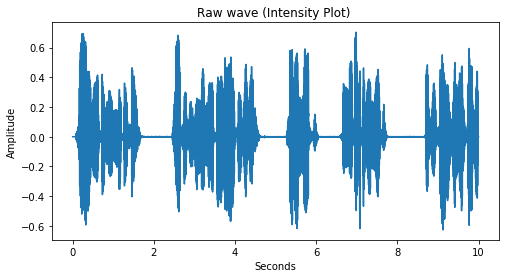

In [25]:
# File 1
samples, sample_rate = librosa.load(one_sample_file)
freqs, times, spectrogram = log_specgram(samples, sample_rate)

input_length = 16000
data = librosa.core.load(one_sample_file)[0]
input_length = len(data)
if len(data) >= input_length:
    data = data[:input_length]
else:
    data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

fig = plt.figure(figsize=(8, 4))
plt.title('Raw wave (Intensity Plot) ')
plt.ylabel('Amplitude')
plt.xlabel('Seconds')
plt.plot(np.linspace(0, 10, len(data)), data)
plt.show()
        


##### 3. Spectrogram

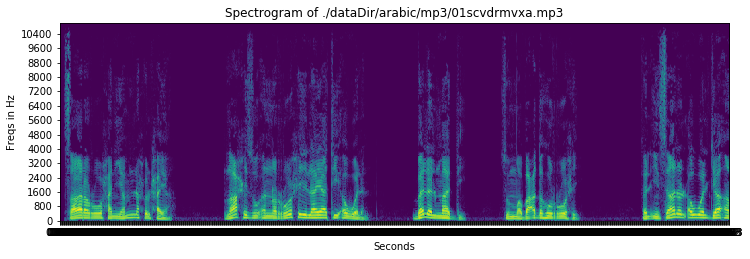

In [26]:
fig = plt.figure(figsize=(12, 8))
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::])
ax2.set_title('Spectrogram of ' + one_sample_file)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')
plt.show()

#### 4. Fast Fourier Transform (FFT) Plot

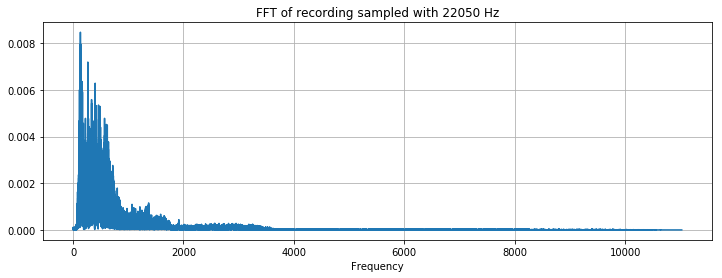

In [27]:
#fig = plt.figure(figsize=(12, 8))
xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

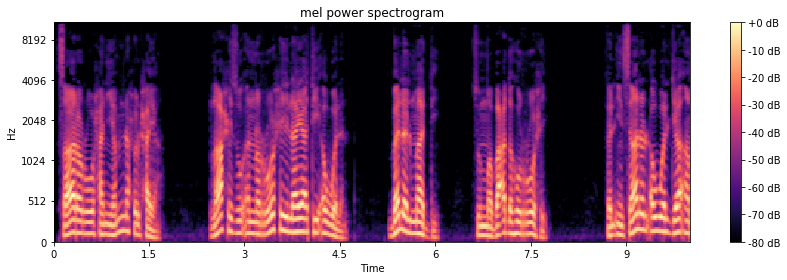

In [28]:

y, sr = librosa.load(one_sample_file)
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

#### 5. Mel Frequency Cepstral Coefficients (MFCC) Plot

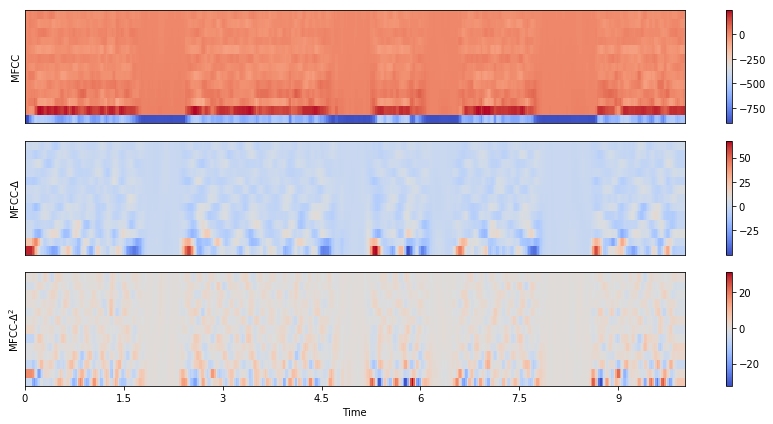

In [29]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

------------------------
------------------------

# Part A: Spectrogram Approach (without Data Augmentation)
### Step 2 - Calculate Spectrograms


<table>
    <tr>
        <td style="padding:10px"><img src="images/spectrogram_end_to_end.png",width=450,height=400></td>
        <td style="padding:30px"><img src="images/SPECTROGRAM_FLOW_CHART.png",width=120,height=100></td>
    </tr>
</table>


## Very important: change the height/width if you would like to run the Spectrogram based model for other dimensions such as 64x64 or even higher
#### Define the size of the specogram images

In [30]:

height=32
width=32

1.  The function below takes input folder name which has MP3 audio recordings <br>
2.  It loops through each MP3 file and calls the function 'mp3_to_img' function to convert to the specotogram image
3.  These images and the corresponding output labels are collected into the array
4.  The arrays are written to the numpy arrays file for later reuse
<img src="images/SPECTROGRAM_FLOW_CHART.png",width=120,height=80>

In [31]:
X = []
labels=[]

def process_audio(in_folder, out_folder='.'):
    os.makedirs(out_folder, exist_ok=True)
    files = glob.glob(in_folder+'*.mp3')
    print('files to process:', len(files))
    start = len(in_folder)
    for file in files:
        #print(file)
        fileName = file.split('/')[-1]
        label = df.loc[df['Sample Filename'] == fileName]['Language'].values[0]
        labels.append(label)
        
        img = mp3_to_img(file,height, width)
        X.append(img)
       
        ##sp.misc.imsave(out_folder + file[start:] + '.jpg', img)
        #imageio.imwrite(out_folder + file[start:] + '.jpg', img)

The function below takes the MP3 file and converts to spectrogram image

In [32]:

def mp3_to_img(path, height=192, width=192):
    signal, sr = lr.load(path, res_type='kaiser_fast')
    hl = signal.shape[0]//(width*1.1) #this will cut away 5% from start and end
    spec = lr.feature.melspectrogram(signal, n_mels=height, hop_length=int(hl))
    img = lr.power_to_db(spec)**2
    start = (img.shape[1] - width) // 2
    return img[:, start:start+width]

Convert the MP3 files to Specogram Image Files

In [33]:
process_audio(targetDataFolderMP3)

files to process: 75


### Write the image and lables to numpy array for later re-use

In [34]:
# convert the text output labels to the numeric arrays using the labels binarizer
encoder = LabelBinarizer()

In [35]:
# get unique output labels 
unique_labels=np.array(labels)

In [36]:
y = encoder.fit_transform(unique_labels)

In [37]:
# build the numpy array file name to write to
#npy_file_name = targetFolderName+ '_'+targetDataFolderJPG.split('/')[-2] + '_' + str(height) + '_' + str(width)+'.npz' 
npy_file_name = targetFolderName+ '_spectrogram_without_data_aug' + '_' + str(height) + '_' + str(width)+'.npz' 

In [38]:
# save the spectrograms and the corresponding output labels to the numpy array file
np.savez(npy_file_name,X=X,y=y)

In [39]:
npy_file_name

'arabic_spectrogram_without_data_aug_32_32.npz'

# Spectrogram Approach (without Data Augmentation)
### Step 3 - Run the Model

1.  Load the numpy array file stored in the previous step
2.  divide by 255 to make image pixels between 0 & 1
3.  re-shape 2D (height, width) to 3D (height, width, 1) as expected by the model

In [40]:
#X = np.array(X)/255.0
npzfile = np.load(npy_file_name)
X = npzfile['X']
y = npzfile['y']
X = np.array(X)/255.0

X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

Initialise the model parameters for training

In [41]:
batch_size = 128
num_classes = y.shape[1]
epochs = 50

# input image dimensions
img_rows, img_cols = height, width

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60, 32, 32, 1)
(60, 3)
(15, 32, 32, 1)
(15, 3)


In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(height,width,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

hist=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60 samples, validate on 15 samples
Epoch 1/50
60/60 [==============================] - 2s 38ms/step - loss: 1.2241 - acc: 0.3333 - val_loss: 2.0306 - val_acc: 0.2667
Epoch 2/50
60/60 [==============================] - 1s 17ms/step - loss: 2.0601 - acc: 0.3500 - val_loss: 1.6796 - val_acc: 0.4000
Epoch 3/50
60/60 [==============================] - 1s 13ms/step - loss: 2.4179 - acc: 0.3167 - val_loss: 1.1049 - val_acc: 0.3333
Epoch 4/50
60/60 [==============================] - 1s 14ms/step - loss: 1.0877 - acc: 0.4500 - val_loss: 1.0905 - val_acc: 0.3333
Epoch 5/50
60/60 [==============================] - 1s 13ms/step - loss: 1.0744 - acc: 0.3833 - val_loss: 1.0856 - val_acc: 0.2667
Epoch 6/50
60/60 [==============================] - 1s 13ms/step - loss: 1.0483 - acc: 0.4500 - val_loss: 1.0700 - val_acc: 0.2667
Epoch 7/50
60/60 [==============================] - 1s 13ms/step - loss: 1.0010 - acc: 0.5833 - val_loss: 1.1243 - val_acc: 0.2000
Epoch 8/50
60/60 [=====================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


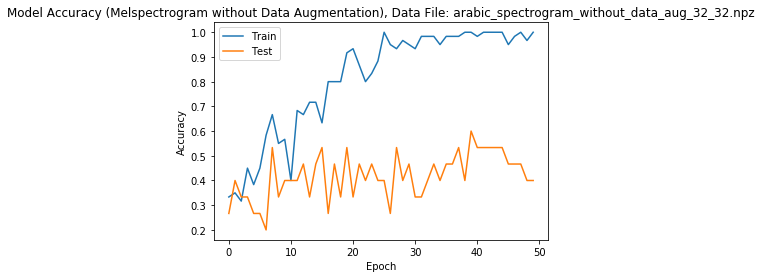

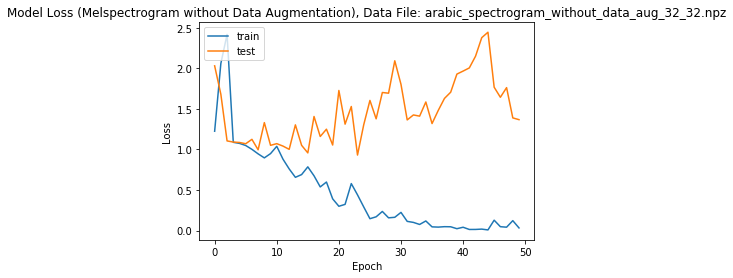

In [45]:
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy (Melspectrogram without Data Augmentation), Data File: '  + npy_file_name )
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss (Melspectrogram without Data Augmentation), Data File: '  + npy_file_name )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


------------------------
------------------------

- - -

# Part  B: Spctogram Approach (with Data Augmentation)

1. Define the Audio Augmentation Class
2. Repeat the step-2 & step-3 described above but on the augmented data set
3. Before the model is run, first lets take a closer look at the data augmentation techniques
<!--
<table>
    <tr>
        <td style="padding:10px"><img src="images/spectrogram_end_to_end.png",width=450,height=400></td>
        <td style="padding:30px"><img src="images/data_aug_flow_chart.png",width=120,height=80></td>
    </tr>
</table>
-->



In [46]:
### Define Augmentation Class - 
class AudioAugmentation:
    def read_audio_file(self, file_path):
        input_length = 16000
        data = librosa.core.load(file_path)[0]
        input_length = len(data)
        if len(data) >= input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data
    def add_noise(self, data):
        noise = np.random.randn(len(data))
        data_noise = data + 0.005 * noise
        return data_noise
    def shift(self, data):
        return np.roll(data, 1600)
    def stretch(self, data, rate=1):
        input_length = 16000
        data = librosa.effects.time_stretch(data, rate)
        input_length = len(data)
        if len(data) >= input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data
    def plot_time_series(self, data, title=''):
        fig = plt.figure(figsize=(8, 4))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.title(title)
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()
    def write_audio_file(self, file, data, sample_rate=16000):
        librosa.output.write_wav(file, data, sample_rate)

In [47]:
aa = AudioAugmentation()

# Preview of the Audio Data Augmentation File

Intensity plot of the original sample file

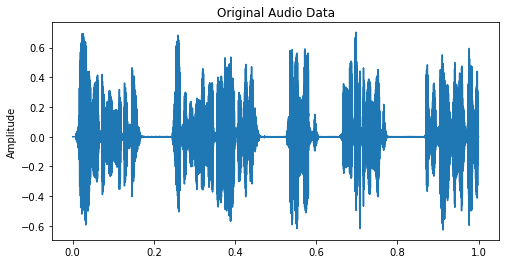

In [48]:
data = aa.read_audio_file(one_sample_file)
original_image = mp3_to_img(one_sample_file,height, width)
aa.plot_time_series(data, title='Original Audio Data')

Add Noise

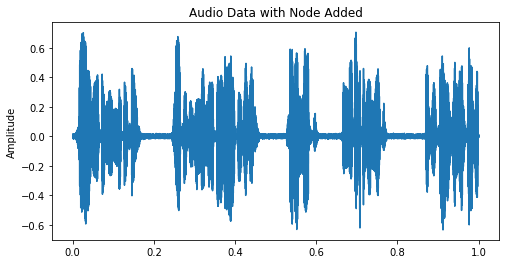

In [49]:
# Adding noise to sound
data_noise = aa.add_noise(data)
hl = data_noise.shape[0]//(width*1.1)
spec = lr.feature.melspectrogram(data_noise, n_mels=height, hop_length=int(hl))
img = lr.power_to_db(spec)**2
start = (img.shape[1] - width) // 2
noisy_image = img[:, start:start+width]

aa.plot_time_series(data_noise, title='Audio Data with Node Added')

Shift the audio data

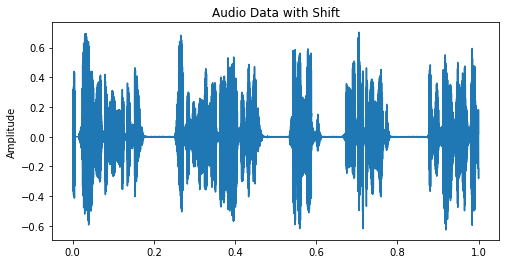

In [50]:
# shift the audio sound data
data_shift = aa.shift(data)

hl = data_shift.shape[0]//(width*1.1)
spec = lr.feature.melspectrogram(data_shift, n_mels=height, hop_length=int(hl))
img = lr.power_to_db(spec)**2
start = (img.shape[1] - width) // 2
shifted_image = img[:, start:start+width]

aa.plot_time_series(data_shift, title='Audio Data with Shift')

Increase the pitch (make sounds more deeper)

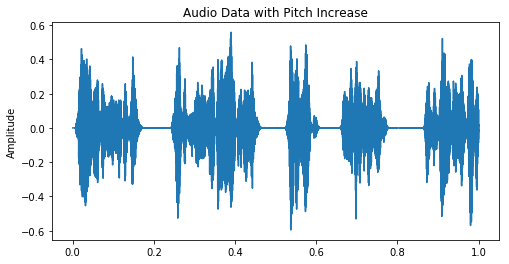

In [51]:
# Compress
stretch_p_data = aa.stretch(data,0.8)

hl = stretch_p_data.shape[0]//(width*1.1)
spec = lr.feature.melspectrogram(stretch_p_data, n_mels=height, hop_length=int(hl))
img = lr.power_to_db(spec)**2
start = (img.shape[1] - width) // 2
stretch_p_image = img[:, start:start+width]

aa.plot_time_series(stretch_p_data, title='Audio Data with Pitch Increase')

Decrease the pitch (high frequency)

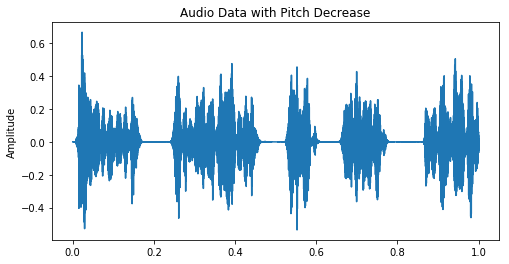

In [52]:
# Slowdown
stretch_f_data = aa.stretch(data,1.2)

hl = stretch_f_data.shape[0]//(width*1.1)
spec = lr.feature.melspectrogram(stretch_f_data, n_mels=height, hop_length=int(hl))
img = lr.power_to_db(spec)**2
start = (img.shape[1] - width) // 2
stretch_f_image = img[:, start:start+width]

aa.plot_time_series(stretch_f_data,title='Audio Data with Pitch Decrease')

Spectrogram of the 5 augmented files (original, noise, shift, compress and slowed) speech files 

/Users/sana/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.



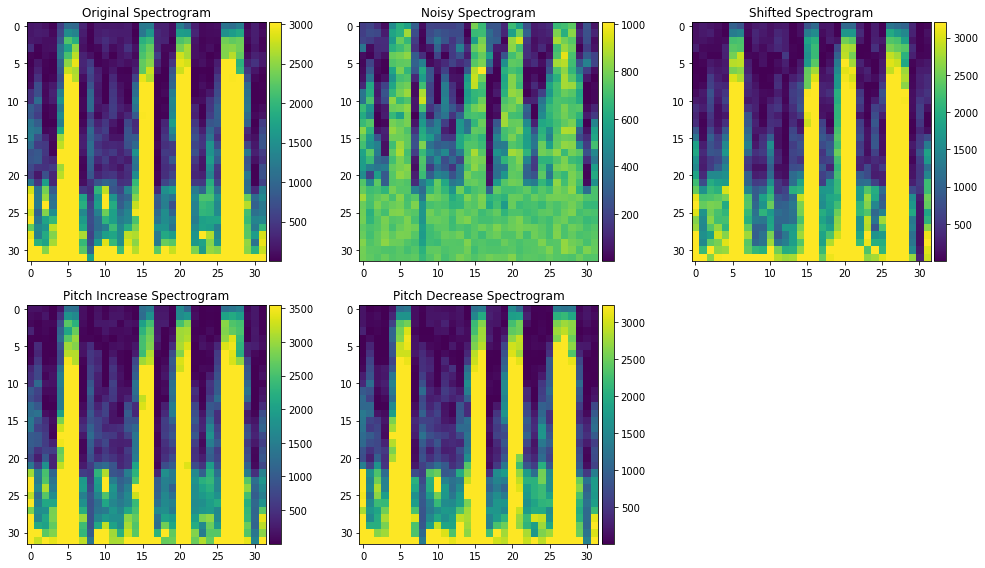

In [53]:
fig=plt.figure(figsize=(14, 8))

fig.add_subplot(2,3,1)
#img = io.imread(targetDataFolderAugmentationJPG  + original_img)
plt.title('Original Spectrogram')
io.imshow(original_image)

fig.add_subplot(2,3,2)
#img = io.imread(targetDataFolderAugmentationJPG  + noisy_file)
plt.title('Noisy Spectrogram')
io.imshow(noisy_image)

fig.add_subplot(2,3,3)
#img = io.imread(targetDataFolderAugmentationJPG  + shift_file)
plt.title('Shifted Spectrogram')
io.imshow(shifted_image)

fig.add_subplot(2,3,4)
#img = io.imread(targetDataFolderAugmentationJPG  + stretch_p)
plt.title('Pitch Increase Spectrogram')
io.imshow(stretch_p_image)

fig.add_subplot(2,3,5)
#img = io.imread(targetDataFolderAugmentationJPG  + stretch_f)
plt.title('Pitch Decrease Spectrogram')
io.imshow(stretch_f_image)

### Now that we have seen the data augmented images, the next step is augment all original mp3 audio recording files using the above 4 techniques discussed 
1. noise
2. shift
3. pitch increase and 
4. pitch decrease


     



<img src="images/data_aug_flow_chart.png",width=150,height=100>

In [54]:
targetLabelsFileNameAugmented = 'targetLangaugesDataLabelsAugmented.csv'
targetDataFolderAugmentationMP3 = os.path.join(targetFolderPath,'augmentationMP3/')
#targetDataFolderAugmentationJPG = os.path.join(targetFolderPath,'augmentationJPG/')


In [55]:
os.makedirs(targetDataFolderAugmentationMP3, exist_ok=True)
#os.makedirs(targetDataFolderAugmentationJPG, exist_ok=True)

In [56]:
files = glob.glob(targetDataFolderMP3+'*.mp3')
len(files)
for file in files:
    #img = mp3_to_img(file)
    #print(file)
    fileName = file.split('/')[-1]
    shutil.copy(file, targetDataFolderAugmentationMP3)
    label = df.loc[df['Sample Filename']==fileName]['Language'].values[0]
    data = aa.read_audio_file(file)
    noisy = aa.add_noise(data)
    shift = aa.shift(data)
    stretch_p = aa.stretch(data,0.8)
    stretch_f = aa.stretch(data,1.2)
    aa.write_audio_file(targetDataFolderAugmentationMP3+fileName+'noisy.mp3', noisy)
    df = df.append({'Sample Filename': fileName+'noisy.mp3', 'Language': label},ignore_index=True)
    aa.write_audio_file(targetDataFolderAugmentationMP3+fileName+'shift.mp3', shift)
    df = df.append({'Sample Filename': fileName+'shift.mp3', 'Language': label},ignore_index=True)
    aa.write_audio_file(targetDataFolderAugmentationMP3+fileName+'stretch_p.mp3', stretch_p)
    df = df.append({'Sample Filename': fileName+'stretch_p.mp3', 'Language': label},ignore_index=True)
    aa.write_audio_file(targetDataFolderAugmentationMP3+fileName+'stretch_f.mp3', stretch_f)
    df = df.append({'Sample Filename': fileName+'stretch_f.mp3', 'Language': label},ignore_index=True)

---

## Spectrogram with Data Augmentation
## Step-2 (with Data Augmentation)
Define the Audio Augmentation Class

<table>
    <tr>
        <td style="padding:10px"><img src="images/spectrogram_end_to_end.png",width=450,height=400></td>
        <!--td style="padding:30px"><img src="images/data_aug_flow_chart.png",width=120,height=80></td-->
    </tr>
</table>

In [57]:
# initialise the arrays to collect the augmented spectrogram images and the corresponding labels
X = []
labels=[]
#process_audio(targetDataFolderAugmentationMP3,targetDataFolderAugmentationJPG)
# process each input audio file and generate the augmented mp3 file
process_audio(targetDataFolderAugmentationMP3)

files to process: 375


In [58]:
#encode the output labels
encoder = LabelBinarizer()
unique_labels=np.array(labels)
y = encoder.fit_transform(unique_labels)


In [59]:
npy_file_name = targetFolderName+ '_spectrogram_with_data_aug'+ '_' + str(height) + '_' + str(width)+'.npz' 
print('numpy file name:', npy_file_name)


numpy file name: arabic_spectrogram_with_data_aug_32_32.npz


In [60]:
np.savez(npy_file_name,X=X,y=y)

# Step-3 Model - (with data augmentation)

In [61]:
#X = np.array(X)/255.0
# Load the numpy array file written to the disk,
# normalise the data by dividing with 255
# Reshape the array
npzfile = np.load(npy_file_name)
X = npzfile['X']
y = npzfile['y']
X = np.array(X)/255.0

X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)

In [62]:
batch_size = 128
num_classes = y.shape[1]
epochs = 50

# input image dimensions
img_rows, img_cols = height, width

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 32, 32, 1)
(300, 3)
(75, 32, 32, 1)
(75, 3)


In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(height,width,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

specogram_data_augmentation_hist=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 300 samples, validate on 75 samples
Epoch 1/50
300/300 [==============================] - 6s 20ms/step - loss: 4.1482 - acc: 0.3100 - val_loss: 1.1165 - val_acc: 0.2933
Epoch 2/50
300/300 [==============================] - 4s 15ms/step - loss: 1.1076 - acc: 0.3333 - val_loss: 1.0918 - val_acc: 0.3200
Epoch 3/50
300/300 [==============================] - 4s 15ms/step - loss: 1.0707 - acc: 0.4167 - val_loss: 1.2191 - val_acc: 0.2933
Epoch 4/50
300/300 [==============================] - 4s 13ms/step - loss: 1.1821 - acc: 0.3667 - val_loss: 1.0694 - val_acc: 0.5333
Epoch 5/50
300/300 [==============================] - 4s 13ms/step - loss: 1.0602 - acc: 0.4067 - val_loss: 1.0272 - val_acc: 0.3867
Epoch 6/50
300/300 [==============================] - 4s 12ms/step - loss: 1.0157 - acc: 0.4800 - val_loss: 0.9842 - val_acc: 0.5467
Epoch 7/50
300/300 [==============================] - 4s 12ms/step - loss: 0.9948 - acc: 0.4967 - val_loss: 0.8817 - val_acc: 0.6000
Epoch 8/50
300/300 [====

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


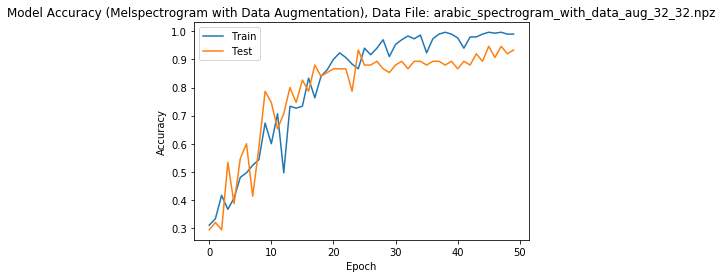

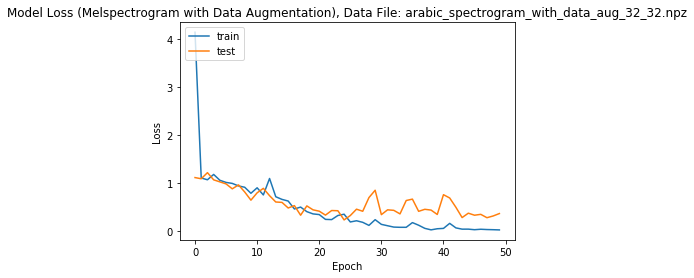

In [66]:
# list all data in history
print(specogram_data_augmentation_hist.history.keys())
# summarize history for accuracy
plt.plot(specogram_data_augmentation_hist.history['acc'])
plt.plot(specogram_data_augmentation_hist.history['val_acc'])
plt.title('Model Accuracy (Melspectrogram with Data Augmentation), Data File: '  + npy_file_name )
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(specogram_data_augmentation_hist.history['loss'])
plt.plot(specogram_data_augmentation_hist.history['val_loss'])
plt.title('Model Loss (Melspectrogram with Data Augmentation), Data File: '  + npy_file_name )
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



---

------------------------
------------------------

# Part C: MFCC Approach (without Data Augmentation)
## Step-1 (same as the Step-1 described above)


<img src="images/mfcc_data_dir.png",width=250,height=200>

MFCC Approach expects the data to be in the following directorys tructure - <br>
./data <br>
./data/label_1 <br>
./data/label_2 <br>
...
<br>
<br>
But, the directory structure from Step-1 of this notebook has created the data in the following manner <br>
./arabic <br>
./arabic/targetLangaugesDataLabels.csv <br>
./arabic/mp3 <br>

Therefore, we need to transform the data slightly as described above. <br<
<br>

The code below just does this rearrangement


In [67]:
targetNewData = os.path.join(targetFolderPath,'data')
os.makedirs(targetNewData,exist_ok=True)
datasetCategory = targetNewData.split('/')[-1]

In [68]:
unique_labels=np.unique(np.array(labels))

In [69]:
unique_labels

array(['Arabic', 'Arabic Egyptian Spoken', 'Arabic Sudanese Spoken'],
      dtype='<U22')

#### Makedirs

In [70]:
for l in unique_labels:
    dir_path= os.path.join(targetFolderPath,datasetCategory,l)
    os.makedirs(dir_path,exist_ok=True)

#### Copy MP3 files from the source directory to the new structure as described above 

In [71]:
files = glob.glob(targetDataFolderMP3+'*.mp3')

In [72]:
for f in files:
    fileName = f.split('/')[-1]
    #print(fileName)
    l = df[df['Sample Filename']==fileName]['Language'].values[0]
    #print(l)
    shutil.copy(f, targetNewData + '/'+l)

## MFCC Approach - Step 2 & Step 3
### Calculate the MFCC coefficients
### Define the model & fit

<table>
    <tr>
        <td style="padding:10px"><img src="images/mfcc_end_to_end.png",width=450,height=400> </td>
        
    </tr>
    
  </table>



In [73]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

Utility function to - <br>
(1) to get the distinct labels from the data folder <br>
(2) to calculare the MFCC for each file <br>
(3) to save the MFCC vectors to numpy array file <br>
(4) to load the numpy array file <br>

In [74]:
# set the data path for the input data without augmentation folder
DATA_PATH = targetNewData

In [75]:

# Input: Folder Path
# Output: Tuple (Label, Indices of the labels, one-hot encoded labels)
def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    if '.DS_Store' in labels:
        labels.remove('.DS_Store')
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)


# Handy function to convert wav2mfcc
def wav2mfcc(file_path, max_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=16000)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc


def save_data_to_array(path=DATA_PATH, max_len=11):
    labels, _, _ = get_labels(path)

    for label in labels:
        # Init mfcc vectors
        mfcc_vectors = []
        lst = os.listdir(path + '/' + label)
        if '.DS_Store' in lst:
            lst.remove('.DS_Store')
        
        wavfiles = [path + '/' + label + '/' + wavfile for wavfile in lst]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(wavfile, max_len=max_len)
            mfcc_vectors.append(mfcc)
        np.save(label + '_' + str(max_len)+'.npy', mfcc_vectors)


def get_train_test(split_ratio=0.8, random_state=42, max_len=11):
    # Get available labels
    labels, indices, _ = get_labels(DATA_PATH)

    # Getting first arrays
    X = np.load(labels[0] +  '_' + str(max_len)+'.npy')
    y = np.zeros(X.shape[0])

    # Append all of the dataset into one single array, same goes for y
    for i, label in enumerate(labels[1:]):
        x = np.load(label +  '_' + str(max_len)+'.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value= (i + 1)))

    assert X.shape[0] == len(y)

    return train_test_split(X, y, test_size= (1 - split_ratio), random_state=random_state, shuffle=True)



def prepare_dataset(path=DATA_PATH):
    labels, _, _ = get_labels(path)
    data = {}
    for label in labels:
        data[label] = {}
        data[label]['path'] = [path  + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]

        vectors = []

        for wavfile in data[label]['path']:
            wave, sr = librosa.load(wavfile, mono=True, sr=None)
            # Downsampling
            wave = wave[::3]
            mfcc = librosa.feature.mfcc(wave, sr=16000)
            vectors.append(mfcc)

        data[label]['mfcc'] = vectors

    return data


def load_dataset(path=DATA_PATH):
    data = prepare_dataset(path)

    dataset = []

    for key in data:
        for mfcc in data[key]['mfcc']:
            dataset.append((key, mfcc))

    return dataset[:100]


# print(prepare_dataset(DATA_PATH))



## MFCC - Vector Size 11 (without Data Augmentation)
### Calculate the MFCC

 <img src="images/mfcc_flow_chart.png",width=150,height=100>

## change 'feature_dim_2' if you would like to run MFCC for other sizes such as 24, 32 or 39 etc.

In [76]:
%load_ext autoreload
%autoreload 2

# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(max_len=feature_dim_2, path=DATA_PATH)

Saving vectors of label - 'Arabic Sudanese Spoken': 100%|██████████| 25/25 [00:01<00:00, 14.31it/s]
Saving vectors of label - 'Arabic': 100%|██████████| 25/25 [00:01<00:00, 15.07it/s]
Saving vectors of label - 'Arabic Egyptian Spoken': 100%|██████████| 25/25 [00:01<00:00, 15.28it/s]


In [77]:
# Load the saved numpy array file created in the previous step
# perform the test/train split
# normalise it
# tranform the labels to categories
X_train, X_test, y_train, y_test = get_train_test(max_len=feature_dim_2)

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = 3

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

## MFCC Approach (without Data Augmentation)
### Step 3 - Run the model


In [78]:
model = get_model()
mfcc_hist_11 = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, 
                    verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 60 samples, validate on 15 samples
Epoch 1/50
60/60 [==============================] - 1s 16ms/step - loss: 2.9921 - acc: 0.2333 - val_loss: 1.7091 - val_acc: 0.3333
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 2.1074 - acc: 0.4000 - val_loss: 4.3699 - val_acc: 0.2667
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 4.1887 - acc: 0.4000 - val_loss: 1.4286 - val_acc: 0.4667
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 2.0642 - acc: 0.3667 - val_loss: 1.4831 - val_acc: 0.2667
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 1.4696 - acc: 0.4167 - val_loss: 1.0601 - val_acc: 0.4000
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 1.2418 - acc: 0.3667 - val_loss: 1.1190 - val_acc: 0.4000
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 1.3106 - acc: 0.3667 - val_loss: 1.0948 - val_acc: 0.3333
Epoch 8/50
60/60 [===========================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


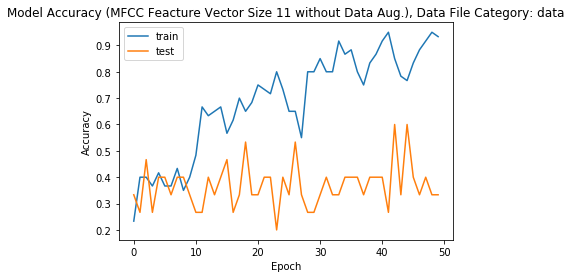

In [79]:
# list all data in history
print(mfcc_hist_11.history.keys())
# summarize history for accuracy
plt.plot(mfcc_hist_11.history['acc'])
plt.plot(mfcc_hist_11.history['val_acc'])
plt.title('Model Accuracy (MFCC Feacture Vector Size ' + str(feature_dim_2) + ' without Data Aug.), Data File Category: ' + datasetCategory)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(mfcc_hist_11.history['loss'])
plt.plot(mfcc_hist_11.history['val_loss'])
plt.title('Model Loss (MFCC Feacture Vector Size ' + str(feature_dim_2) + ' without Data Aug.), Data File Category: ' + datasetCategory)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

---

------------------------
------------------------

# PART D: MFCC Approach (with Data Augmentation)

## Step-1 : Rearrange the augmented MP3 files into the labels directory structure as described below.
./dataAug<br>
./dataAug/label_1<br>
./dataAug/label_2 <br>
./dataAug/label_3<br>



<table>
    <tr>
        <td style="padding:10px"><img src="images/mfcc_end_to_end.png",width=450,height=400> </td>
        <!--td style="padding:100px"> <img src="images/mfcc_flow_chart.png",width=150,height=100></td-->
    </tr>
    
  </table>

In [80]:
targetNewDataAug = os.path.join(targetFolderPath,'dataAug')
os.makedirs(targetNewDataAug,exist_ok=True)
datasetCategory = targetNewDataAug.split('/')[-1]

In [81]:
unique_labels=np.unique(np.array(labels))

In [82]:
unique_labels

array(['Arabic', 'Arabic Egyptian Spoken', 'Arabic Sudanese Spoken'],
      dtype='<U22')

#### Make directories, if they dont exist
./dataAug<br>
./dataAug/Arabic<br>
./dataAug/Arabic Egyptian Spoken <br>
./dataAug/Arabic Sudanese Spoken<br>


In [83]:
for l in unique_labels:
    dir_path= os.path.join(targetFolderPath,datasetCategory,l)
    os.makedirs(dir_path,exist_ok=True)

#### Copy Augmented MP3 files from the source directory to the new structure as described above 

In [84]:
files = glob.glob(targetDataFolderAugmentationMP3+'*.mp3')

In [85]:
for f in files:
    fileName = f.split('/')[-1]
    #print(fileName)
    l = df[df['Sample Filename']==fileName]['Language'].values[0]
    #print(l)
    shutil.copy(f, targetNewDataAug + '/'+l)

# MFCC Approach (with Data Augmentation)
## Step 2 - calculate MFCC for all MP3 files in dataAug folder

<img src="images/mfcc_flow_chart.png",width=150,height=100>

In [86]:
#DATA_PATH = "/Users/sana/Harvard/Week13/arabic/dataAug/"
# Set the data path to the data augmentation MP3 folder so the MFCC vectors can be calculated
DATA_PATH = targetNewDataAug

## Important - change 'feature_dim_2' if you want to tun MFCC for other sizes such as 24, 32 or 39 etc.

In [87]:
# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(path=DATA_PATH, max_len=feature_dim_2)

Saving vectors of label - 'Arabic Sudanese Spoken': 100%|██████████| 125/125 [00:09<00:00, 12.61it/s]
Saving vectors of label - 'Arabic': 100%|██████████| 125/125 [00:11<00:00, 11.36it/s]
Saving vectors of label - 'Arabic Egyptian Spoken': 100%|██████████| 125/125 [00:09<00:00, 12.54it/s]


# MFCC Approach (with Data Augmentation)
## Step 3 - Run the Model

In [88]:
# Load the saved numpy array file created in the previous step
# perform the test/train split
# normalise it
# tranform the labels to categories
X_train, X_test, y_train, y_test = get_train_test(max_len=feature_dim_2)

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = 3

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [89]:
model = get_model()
mfcc_aug_hist_11 = model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, 
                    verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 300 samples, validate on 75 samples
Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 2.6955 - acc: 0.2933 - val_loss: 1.5063 - val_acc: 0.3067
Epoch 2/50
300/300 [==============================] - 0s 2ms/step - loss: 1.4004 - acc: 0.3700 - val_loss: 1.1475 - val_acc: 0.2933
Epoch 3/50
300/300 [==============================] - 0s 2ms/step - loss: 1.1726 - acc: 0.3633 - val_loss: 1.0818 - val_acc: 0.3867
Epoch 4/50
300/300 [==============================] - 0s 2ms/step - loss: 1.0851 - acc: 0.4367 - val_loss: 0.9815 - val_acc: 0.5067
Epoch 5/50
300/300 [==============================] - 0s 2ms/step - loss: 1.0355 - acc: 0.4733 - val_loss: 1.0571 - val_acc: 0.4400
Epoch 6/50
300/300 [==============================] - 1s 2ms/step - loss: 0.9713 - acc: 0.5433 - val_loss: 1.0242 - val_acc: 0.4400
Epoch 7/50
300/300 [==============================] - 1s 2ms/step - loss: 0.9669 - acc: 0.5233 - val_loss: 0.9003 - val_acc: 0.6267
Epoch 8/50
300/300 [===========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


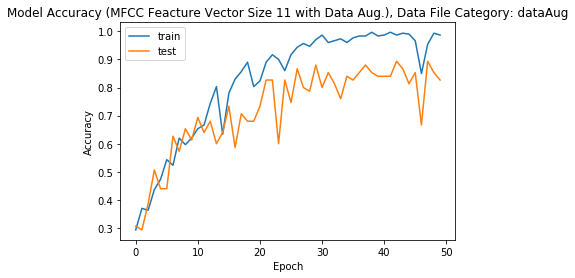

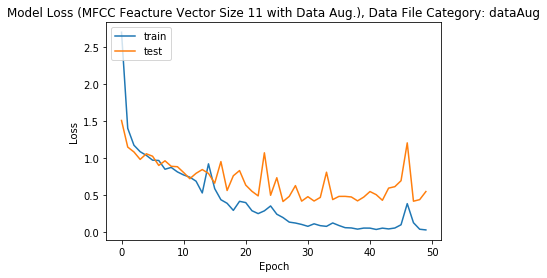

In [90]:
# list all data in history
print(mfcc_aug_hist_11.history.keys())
# summarize history for accuracy
plt.plot(mfcc_aug_hist_11.history['acc'])
plt.plot(mfcc_aug_hist_11.history['val_acc'])
plt.title('Model Accuracy (MFCC Feacture Vector Size ' + str(feature_dim_2) + ' with Data Aug.), Data File Category: ' + datasetCategory)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(mfcc_aug_hist_11.history['loss'])
plt.plot(mfcc_aug_hist_11.history['val_loss'])
plt.title('Model Loss (MFCC Feacture Vector Size ' + str(feature_dim_2) + ' with Data Aug.), Data File Category: ' + datasetCategory)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()